EDA - Exploratory Data Analysis на примере данных о заболевании аутизмом

Расстройство аутистического спектра (РАС) — это нарушение развития нервной системы, связанное со значительными затратами на здравоохранение, и ранняя диагностика может значительно сократить их.  

Следовательно, мы предлагаем новый набор данных, связанный со скринингом взрослых на аутизм, который содержит 20 признаков, которые можно использовать для дальнейшего анализа, особенно для определения влиятельных аутичных черт и улучшения классификации случаев РАС. В этом наборе данных мы записываем десять поведенческих характеристик (AQ-10-Adult) плюс десять индивидуальных характеристик, которые доказали свою эффективность в выявлении случаев РАС среди контрольной группы в науке о поведении.


age - Age Number Age in years

gender - Gender String Male or Female

ethnicity - Ethnicity String List of common ethnicities in text format

jundice - Born with jaundice Boolean (yes or no) Whether the case was born with jaundice

austim - Family member with PDD Boolean (yes or no) Whether any immediate family member has a PDD

relation - Who is completing the test String Parent, self, caregiver, medical staff, clinician ,etc.

contry_of_res - Country of residence String List of countries in text format

used_app_before - Used the screening app before Boolean (yes or no) Whether the user has used a screening app

age_desc - Описание возраста

Class/ASD - признак автоматической диагностики аутизма (не описан)

Этого похоже нет: Screening Method Type Integer (0,1,2,3) The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult) 
     
Question 1-10 Answer Binary (0, 1) The answer code of the question based on the screening method used

result - Screening Score Integer The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [287]:
df = pd.read_csv('Autism_data.csv', sep=',')
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO


Определим, какие признаки являются категориальными и бинарными и количественными

In [288]:
categorial_cols = []
digital_cols = []
boolean_cols = []
useless = []
for key in df.columns:
    if df[key].dtype in ['int64', 'float64']:
        digital_cols.append(key)
    if df[key].dtype == 'object': 
        if len(df[key].unique()) == 2:
            boolean_cols.append(key)
        elif len(df[key].unique()) > 2:   
            categorial_cols.append(key)
        else:
            useless.append(key)
        print(key)    
        print('\tМножество уникальных значений', df[key].unique())
print('Категориальные:', categorial_cols) 
print('Количественные', digital_cols)
print('Бинарные', boolean_cols)
print('Признаки с одним значением, одинаковым для всей выборки', useless)

age
	Множество уникальных значений ['26' '24' '27' '35' '40' '36' '17' '64' '29' '33' '18' '31' '30' '34'
 '38' '42' '43' '48' '37' '55' '50' '53' '20' '28' '21' '383' '47' '32'
 '44' '?' '19' '58' '45' '22' '39' '25' '23' '54' '60' '41' '46' '56' '61'
 '59' '52' '49' '51']
gender
	Множество уникальных значений ['f' 'm']
ethnicity
	Множество уникальных значений ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian'
 "'Middle Eastern '" 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish'
 'others']
jundice
	Множество уникальных значений ['no' 'yes']
austim
	Множество уникальных значений ['no' 'yes']
contry_of_res
	Множество уникальных значений ["'United States'" 'Brazil' 'Spain' 'Egypt' "'New Zealand'" 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland'
 "'United Arab Emirates'" 'Afghanistan' 'Lebanon' "'United Kingdom'"
 "'South Africa'" 'Italy' 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China'
 'Australia' 'Canada' "'Saudi Arabia'" 'Netherlands' 'Romania' 'Sweden'
 'Tonga' 'Oman

In [289]:
# Extract age values
df['age_str'] = df['age']
df['age'] = df['age'].apply(lambda x: float(x) if x.isnumeric() else np.nan)
df['age'] = df['age'].apply(lambda x: x if x <= 125. else np.nan)
mean_age = df['age'].mean()
print(mean_age)
df['age'].fillna(mean_age, inplace=True)

def get_age_category(x):
    age_dict = {0: [17., 20.], 1: [21., 30.], 2: [31., 40.], 3: [41., 50.], 4: [51, 64.]}
    for key, val in age_dict.items():
        if val[0] <= x <= val[1]:
            return key
    return -1    
   
df['age_category'] = np.nan
df['age_category'] = df['age'].apply(lambda x: get_age_category(x))
df['age'].describe() 

29.19400855920114


count    704.000000
mean      29.194009
std        9.690782
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

In [290]:
df_by_age = df.groupby(['age_category', 'Class/ASD'])['age_category'].count()
df_by_age

age_category  Class/ASD
0             NO            98
              YES           32
1             NO           253
              YES           74
2             NO           103
              YES           46
3             NO            45
              YES           24
4             NO            16
              YES           13
Name: age_category, dtype: int64

In [291]:
resume = ['С увеличением возрастной категории растет доля обнаружения случаев аутизма']

In [292]:
# Transformation of binary features
for key in boolean_cols:
    df[key] = df[key].apply(lambda x: 0 if x.lower() in ['no', 'f'] else 1)
df.loc[:, boolean_cols]    

,gender,jundice,austim,used_app_before,Class/ASD
0,0,0,0,0,0
1,1,0,1,0,0
2,1,1,1,0,1
3,0,0,1,0,0
4,0,0,0,0,0
...,...,...,...,...,...
699,0,0,0,0,1
700,1,0,0,0,0
701,0,0,0,0,1
702,1,0,0,0,0


In [293]:
df.groupby(['relation'])['relation'].count()

relation
'Health care professional'      4
?                              95
Others                          5
Parent                         50
Relative                       28
Self                          522
Name: relation, dtype: int64

In [294]:
# Converting string features

# "relation" - кто заполнял тест. Бинарный признак, сам или кто-то еще. 
# В большинстве случаев человек заполнял сам (значение признака изменим на 1), поэтому 
# если признак не определен ('?'), то поле будет заполнено 1. 
# Если кто-то другой заполнял тест за подопытного, то значение признака будет 0

# Этническая принадлежность Latino = Hispanic,  Others = others, Middle Eastern включает Turkish, 
# азиатов с Pasifika  в одну группу
literal_dicts = {'ethnicity': 
                    {'White-European': 1, 
                     'Latino': 2, '?': 0, 
                     'Others': 0, 
                     'Black': 3, 
                     'Asian':4,
                     "'Middle Eastern '": 5, 
                     'Pasifika': 4, 
                     "'South Asian'": 4, 
                     'Hispanic': 2,
                     'Turkish': 5, 
                     'others': 0}, 
                 'relation': 
                    {'Self': 1, 
                     'Parent': 0, 
                     '?': 1, 
                     "'Health care professional'": 0, 
                     'Relative': 0,
                     'Others': 0}           
                }

for key in literal_dicts.keys():
    try:
        df[key] = df[key].apply(lambda x: literal_dicts.get(key).get(x))
    except:
        print(key)
        
df['contry_of_res'] = df['contry_of_res'].apply(lambda x: x.replace("'", ''))
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,age_str,age_category
0,1,1,1,1,0,0,1,1,0,0,...,0,0,United States,0,6,'18 and more',1,0,26,1
1,1,1,0,1,0,0,0,1,0,1,...,0,1,Brazil,0,5,'18 and more',1,0,24,1


In [295]:
# Распределим страны по регионам, вдруг там что-то интересное
regions = {('Brazil', 'Argentina', 'Chile', 'Sierra Leone', 'Costa Rica', 'Mexico', 'Nicaragua', 'Uruguay', 'Bolivia', 
                 'Aruba', 'Ecuador'): 0,
           ('United States', 'Bahamas', 'Canada'): 1,
           ('Jordan', 'United Arab Emirates', 'Lebanon', 'Saudi Arabia', 
            'Oman', 'Iran', 'Turkey', 'Iraq', 'Egypt'): 2,
           ('Japan'): 3,
           ('Afghanistan', 'Pakistan', 'Bangladesh', 'India', 'Sri Lanka', 'Viet Nam', 'Malaysia', 'Nepal', 'Philippines',
              'Indonesia'): 4,
           ('Spain', 'Austria', 'Ireland', 'United Kingdom', 'Italy', 'France', 'Netherlands', 'Romania', 'Sweden', 'Germany',
         'Iceland', 'Serbia', 'Portugal', 'Belgium', 'Finland', 'Czech Republic', 'Cyprus'): 5,
           ('China', 'Hong Kong'): 6,
           ('Russia', 'Armenia', 'Ukraine', 'Kazakhstan', 'Azerbaijan'): 7,
           ('Australia'): 8,
           ('New Zealand', 'Tonga', 'AmericanSamoa'): 9,
           ('Burundi', 'South Africa', 'Ethiopia', 'Niger', 'Angola'): 10          
          }
df['region'] = ''
def define_reg(x):
    for states, reg in regions.items():
        if x in states:
            return reg
    return None    
df['region'] = df['contry_of_res'].apply(lambda x: define_reg(x))

# удалим колонку с бесполезным признаком
for key in useless:
    del df[key]

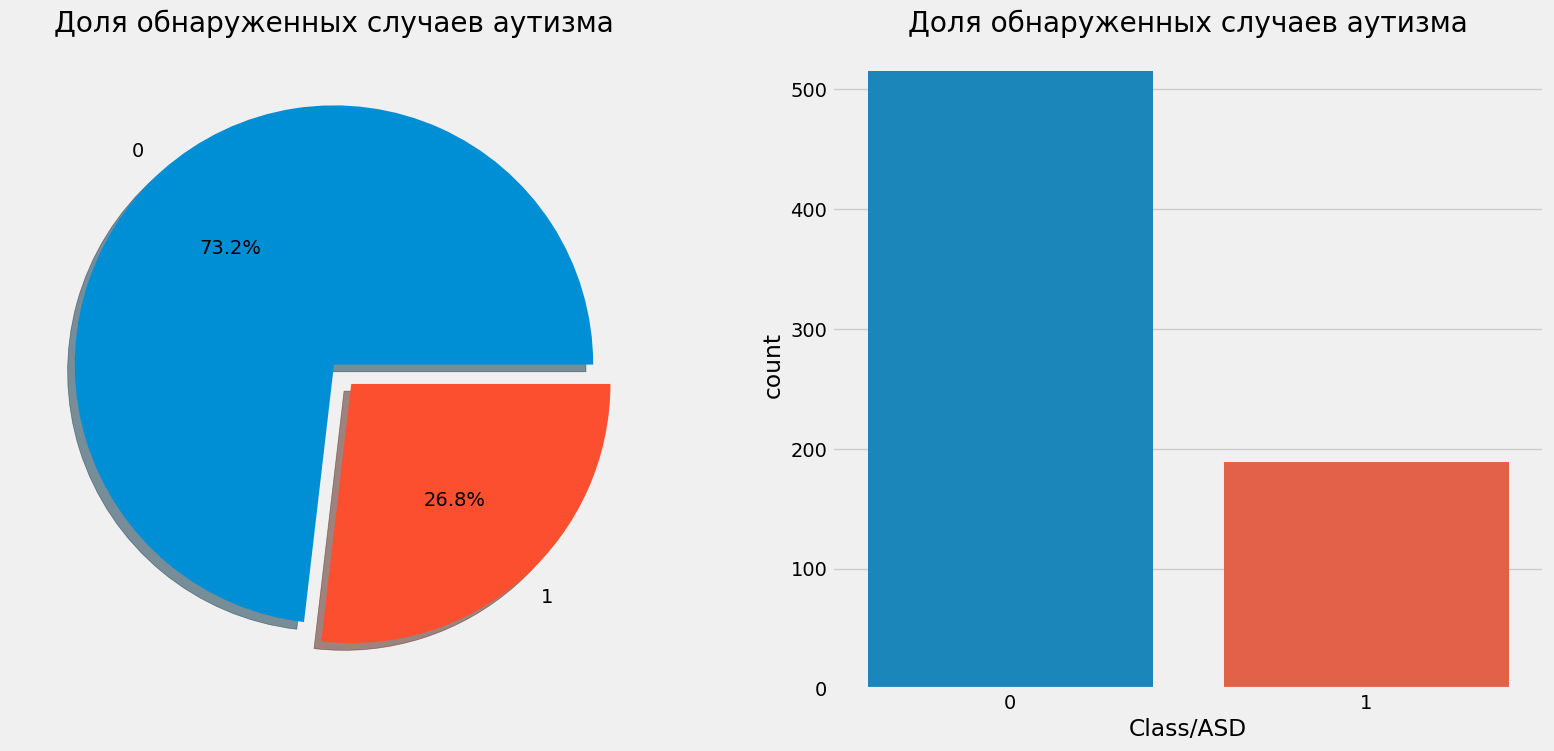

In [296]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Class/ASD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Доля обнаруженных случаев аутизма')
ax[0].set_ylabel('')
sns.countplot(x=df['Class/ASD'],ax=ax[1])
ax[1].set_title('Доля обнаруженных случаев аутизма')
plt.show()


Анализ признаков

Gender feature

In [298]:
df.groupby(['gender','Class/ASD'])['Class/ASD'].count()

gender  Class/ASD
0       0            234
        1            103
1       0            281
        1             86
Name: Class/ASD, dtype: int64

In [299]:
healthy_male_percents = df[(df['gender'] == 1) & (df['Class/ASD'] == 0)].shape[0]/df[df['gender']==1].shape[0] * 100
healthy_female_percents = df[(df['gender'] == 0) & (df['Class/ASD'] == 0)].shape[0]/df[df['gender']==0].shape[0] * 100
print(f'Healthy males {healthy_male_percents:5.2f}% of male number.')
print(f'Healthy females {healthy_female_percents:5.2f}% of female number.')

Healthy males 76.57% of male number.
Healthy females 69.44% of female number.


In [301]:
healthy_male_exceed = healthy_male_percents - healthy_female_percents
resume.append(f"Среди мужчин и женцин в выборке мужчин доля здоровых больше на {healthy_male_exceed:5.2f} чем доля здоровых женщин в выборке женщин")

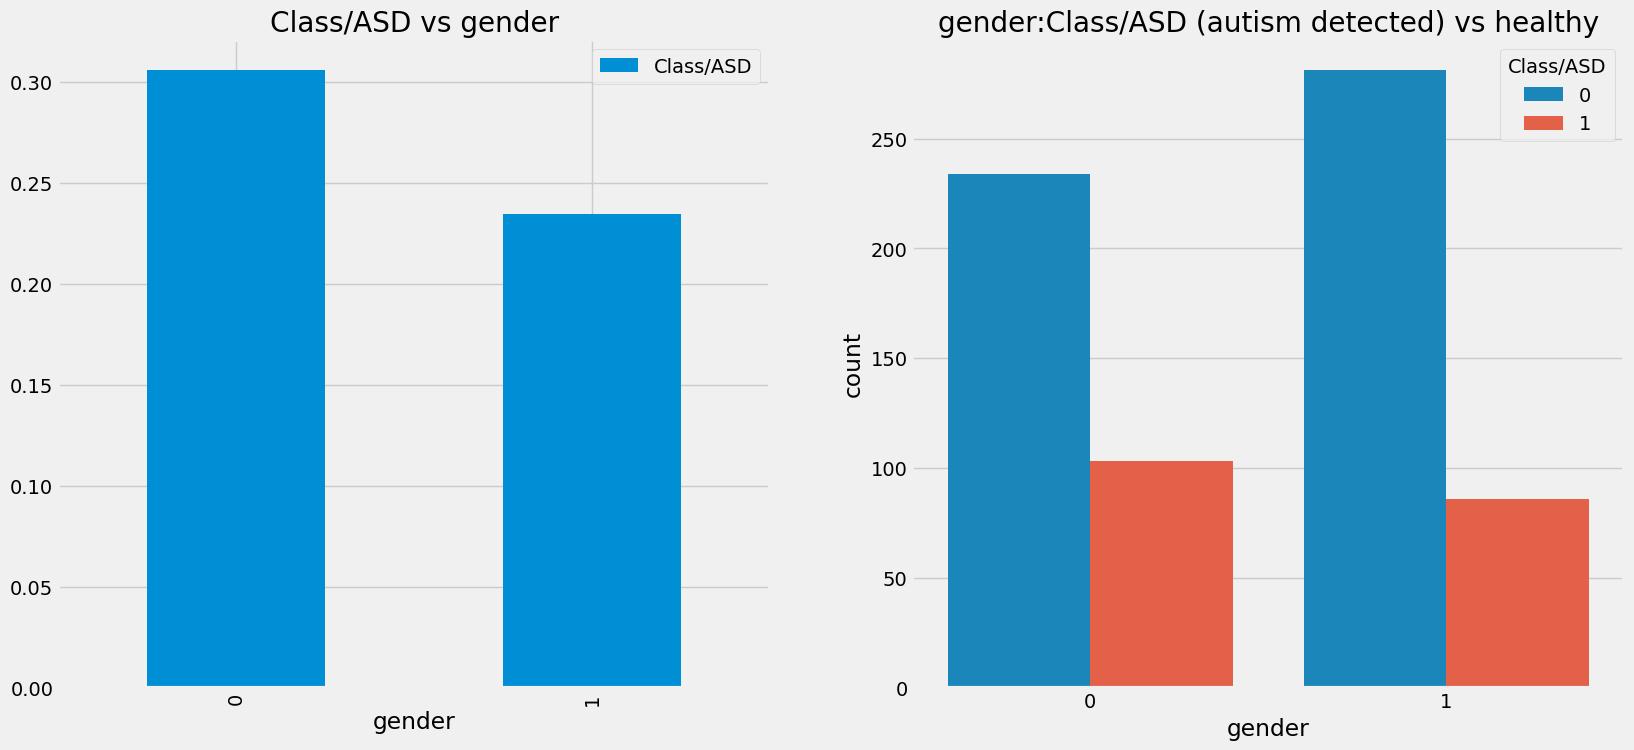

In [302]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['gender','Class/ASD']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Class/ASD vs gender')
sns.countplot(x=df['gender'], hue=df['Class/ASD'], ax=ax[1])
ax[1].set_title('gender:Class/ASD (autism detected) vs healthy')
plt.show()

result feature

In [303]:
pd.crosstab(df['result'],df['Class/ASD'],margins=True).style.background_gradient(cmap='summer_r')
resume.append(f'Количество набранных баллов: до 7 - случаев аутизма нет. Все случаи аутизма относятся к тем, кто набрал более 7')

In [304]:
print(df.columns)
print(literal_dicts.get('ethnicity'))
pd.crosstab(df['ethnicity'],df['Class/ASD'],margins=True).style.background_gradient(cmap='summer_r')


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD', 'age_str', 'age_category', 'region'],
      dtype='object')
{'White-European': 1, 'Latino': 2, '?': 0, 'Others': 0, 'Black': 3, 'Asian': 4, "'Middle Eastern '": 5, 'Pasifika': 4, "'South Asian'": 4, 'Hispanic': 2, 'Turkish': 5, 'others': 0}


Class/ASD,0,1,All
ethnicity,,,
0,108,18,126
1,124,109,233
2,18,15,33
3,25,18,43
4,151,20,171
5,89,9,98
All,515,189,704


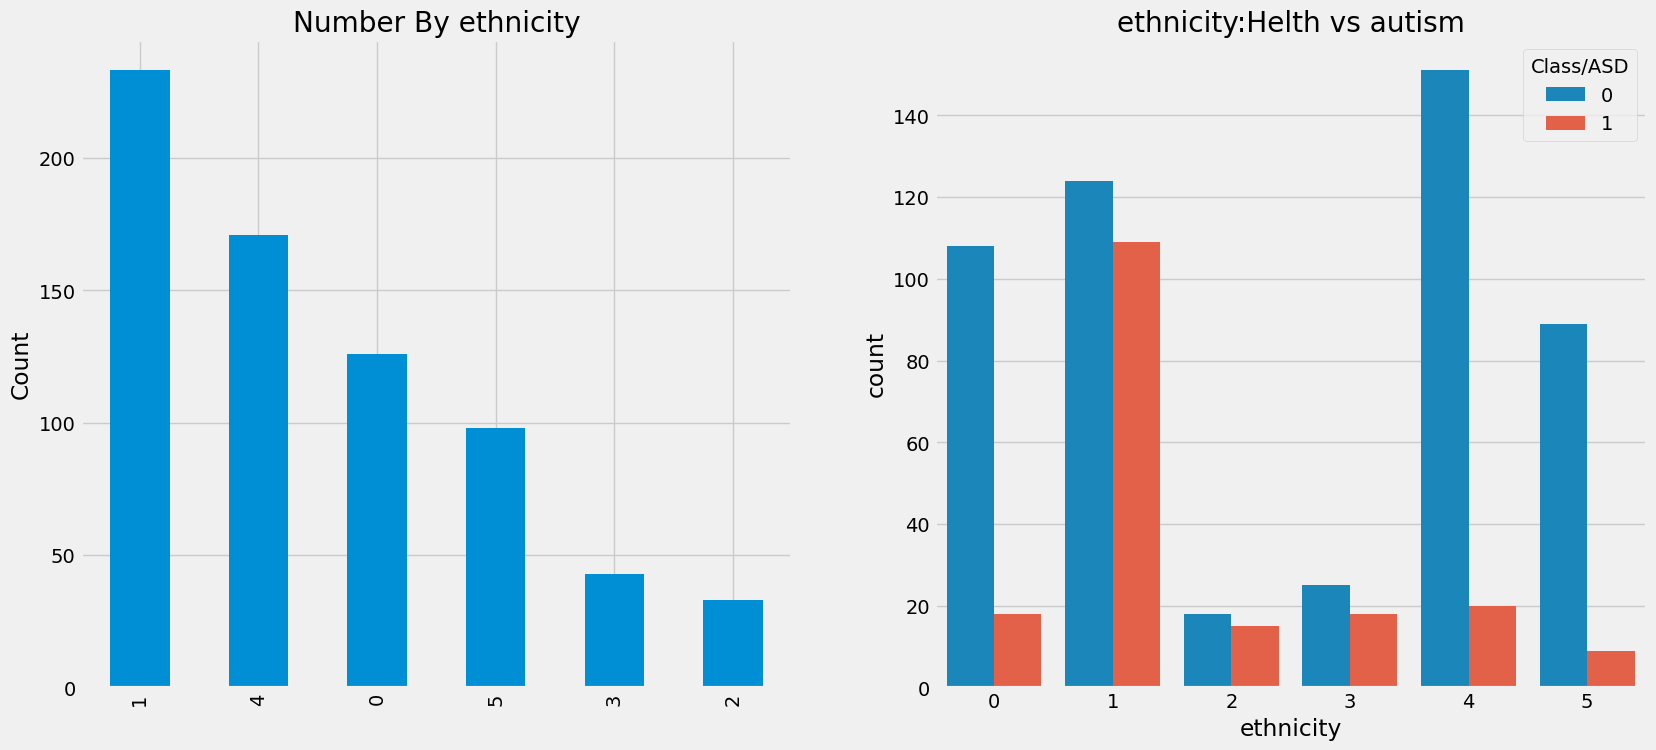

In [305]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['ethnicity'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number By ethnicity')
ax[0].set_ylabel('Count')
sns.countplot(x=df['ethnicity'], hue=df['Class/ASD'],ax=ax[1])
ax[1].set_title('ethnicity:Helth vs autism')
plt.show()

Nationalities whose representatives are most susceptible to autism

In [307]:
has_many_cases_of_autism = [1,2,3]
answer = []
for key, val in literal_dicts.get('ethnicity').items():
    if val in [1,2,3]:
        answer.append(key + f'({val})')
resume.append('Чаще всего аутизм обнаруживается у ' + ', '.join(answer))

In [308]:
df.groupby(['region','Class/ASD'])['Class/ASD'].count()

region  Class/ASD
0       0             15
        1             12
1       0             66
        1             64
2       0            141
        1              6
3       0              1
4       0            114
        1             16
5       0             77
        1             57
6       0              1
        1              1
7       0             12
        1              3
8       0             15
        1             12
9       0             68
        1             16
10      0              5
        1              2
Name: Class/ASD, dtype: int64

In [309]:
regions

{('Brazil',
  'Argentina',
  'Chile',
  'Sierra Leone',
  'Costa Rica',
  'Mexico',
  'Nicaragua',
  'Uruguay',
  'Bolivia',
  'Aruba',
  'Ecuador'): 0,
 ('United States', 'Bahamas', 'Canada'): 1,
 ('Jordan',
  'United Arab Emirates',
  'Lebanon',
  'Saudi Arabia',
  'Oman',
  'Iran',
  'Turkey',
  'Iraq',
  'Egypt'): 2,
 'Japan': 3,
 ('Afghanistan',
  'Pakistan',
  'Bangladesh',
  'India',
  'Sri Lanka',
  'Viet Nam',
  'Malaysia',
  'Nepal',
  'Philippines',
  'Indonesia'): 4,
 ('Spain',
  'Austria',
  'Ireland',
  'United Kingdom',
  'Italy',
  'France',
  'Netherlands',
  'Romania',
  'Sweden',
  'Germany',
  'Iceland',
  'Serbia',
  'Portugal',
  'Belgium',
  'Finland',
  'Czech Republic',
  'Cyprus'): 5,
 ('China', 'Hong Kong'): 6,
 ('Russia', 'Armenia', 'Ukraine', 'Kazakhstan', 'Azerbaijan'): 7,
 'Australia': 8,
 ('New Zealand', 'Tonga', 'AmericanSamoa'): 9,
 ('Burundi', 'South Africa', 'Ethiopia', 'Niger', 'Angola'): 10}

In [310]:
resume.append('Доля случаев аутизма выше для европейцев и североамериканцев. А нет ли тут связи с уровнем жизни? ')

In [311]:
pd.crosstab(df['age_category'],df['Class/ASD'],margins=True).style.background_gradient(cmap='summer_r')


Class/ASD,0,1,All
age_category,,,
0,98,32,130
1,253,74,327
2,103,46,149
3,45,24,69
4,16,13,29
All,515,189,704


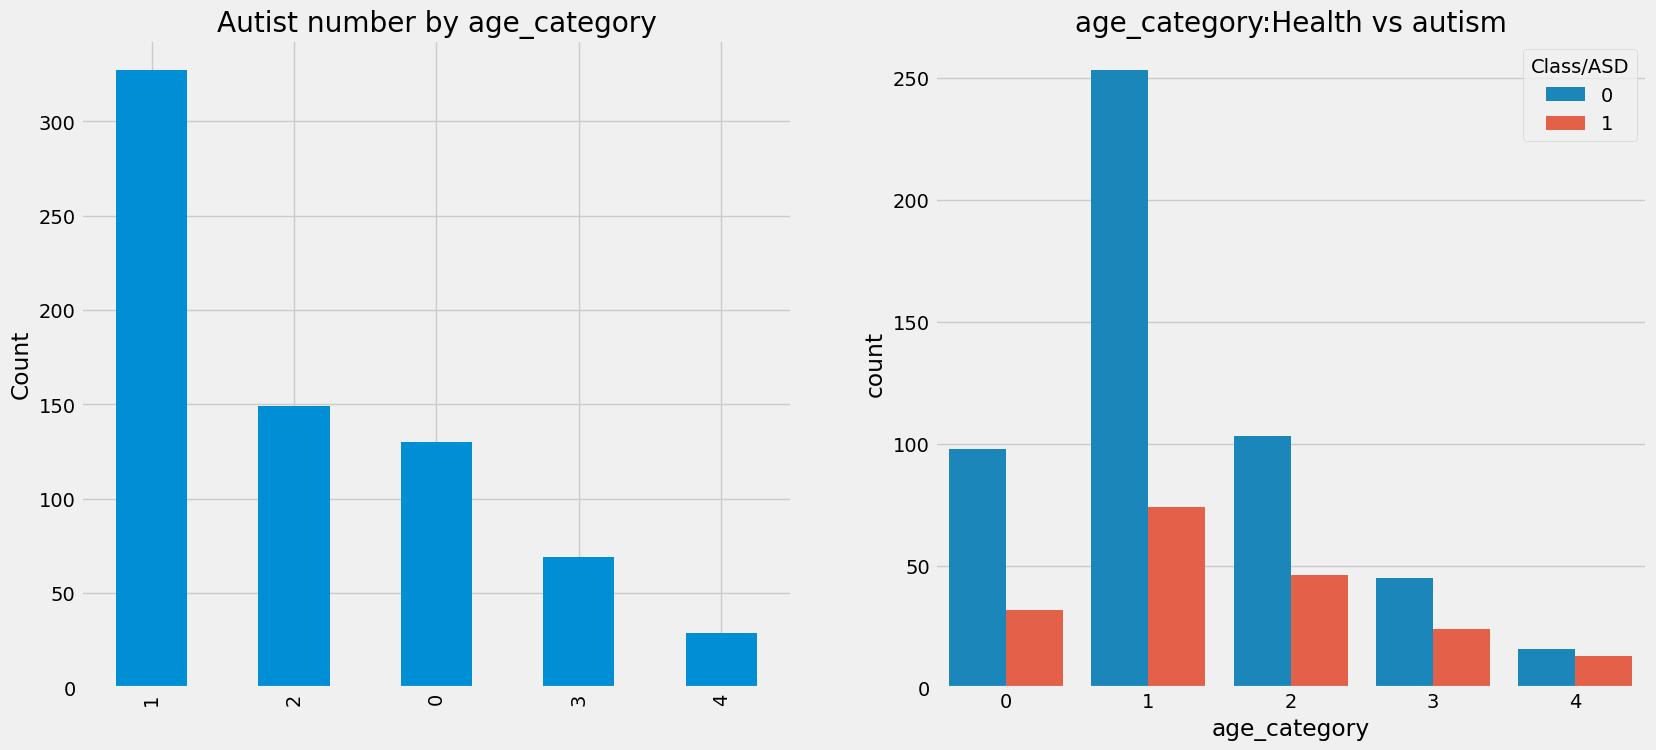

In [312]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['age_category'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Autist number by age_category')
ax[0].set_ylabel('Count')
sns.countplot(x=df['age_category'], hue=df['Class/ASD'],ax=ax[1])
ax[1].set_title('age_category:Health vs autism')
plt.show()

In [202]:
# Having relatives with autism
pd.crosstab(df['austim'],df['Class/ASD'],margins=True).style.background_gradient(cmap='summer_r')

Class/ASD,0,1,All
austim,,,
0,467,146,613
1,48,43,91
All,515,189,704


In [317]:
has_relatives = df[(df['austim'] == 1) & (df['Class/ASD'] == 1)].shape[0]/df[df['austim']==1].shape[0] * 100
no_relatives = df[(df['austim'] == 0) & (df['Class/ASD'] == 1)].shape[0]/df[df['austim']==0].shape[0] * 100

print(f'Доля случаев аутизма среди тех, у кого болен родственник {has_relatives:5.2f}% .')
print(f'Доля случаев аутизма среди тех, у кого нет больных аутизмом родственников {no_relatives:5.2f}% .')
resume.append(f'среди родственников аутистов аутизм встречается чаще на {has_relatives-no_relatives:5.2f}% .')



Доля случаев аутизма среди тех, у кого болен родственник 47.25% .
Доля случаев аутизма среди тех, у кого нет больных аутизмом родственников 23.82% .


In [318]:
# Having jundice
pd.crosstab(df['jundice'],df['Class/ASD'],margins=True).style.background_gradient(cmap='summer_r')

Class/ASD,0,1,All
jundice,,,
0,474,161,635
1,41,28,69
All,515,189,704


In [319]:
had_jundice = df[(df['jundice'] == 1) & (df['Class/ASD'] == 1)].shape[0]/df[df['jundice']==1].shape[0] * 100
no_jundice = df[(df['jundice'] == 0) & (df['Class/ASD'] == 1)].shape[0]/df[df['jundice']==0].shape[0] * 100

print(f'Доля случаев аутизма среди тех, у кого была желтуха {had_jundice:5.2f}% .')
print(f'Доля случаев аутизма среди тех, у кого желтухи не было {no_jundice:5.2f}% .')
resume.append(f'У болевших желтухой аутизм встречается чаще на {had_jundice-no_jundice:5.2f}% .')

Доля случаев аутизма среди тех, у кого была желтуха 40.58% .
Доля случаев аутизма среди тех, у кого желтухи не было25.35% .


In [320]:
# Having autism test before
pd.crosstab(df['used_app_before'],df['Class/ASD'],margins=True).style.background_gradient(cmap='summer_r')

Class/ASD,0,1,All
used_app_before,,,
0,508,184,692
1,7,5,12
All,515,189,704


There is a correlation with the fact of a second test, but this is not related to the cause of the disease.
The sign can be ignored, in the sample only 1.7% of those who took the test earlier.

In [322]:
second = df[(df['used_app_before'] == 1) & (df['Class/ASD'] == 1)].shape[0]/df[df['used_app_before']==1].shape[0] * 100
first = df[(df['used_app_before'] == 0) & (df['Class/ASD'] == 1)].shape[0]/df[df['used_app_before']==0].shape[0] * 100

print(f'Доля случаев аутизма среди тех, кто второй раз тестируется {second:5.2f}% .')
print(f'Доля случаев аутизма среди тех,  кто пришел в первый раз{first:5.2f}% .')
resume.append(f'У уже проходивших тест аутизм встречается чаще на {second-first:5.2f}% .')

Доля случаев аутизма среди тех, кто второй раз тестируется 41.67% .
Доля случаев аутизма среди тех,  кто пришел в первый раз26.59% .


In [205]:
# Who fill the test 1 - self, 0 - somebody else
pd.crosstab(df['relation'],df['Class/ASD'],margins=True).style.background_gradient(cmap='summer_r')

Class/ASD,0,1,All
relation,,,
0,64,23,87
1,451,166,617
All,515,189,704


In [325]:
self = df[(df['relation'] == 1) & (df['Class/ASD'] == 1)].shape[0]/df[df['relation']==1].shape[0] * 100
other = df[(df['relation'] == 0) & (df['Class/ASD'] == 1)].shape[0]/df[df['relation']==0].shape[0] * 100

print(f'Доля случаев аутизма среди тех, кто сам заполнил тест{self:5.2f}% .')
print(f'Доля случаев аутизма среди тех, кто не заполнял тест сам {other :5.2f}% .')
resume.append(f'Доля случаев аутизма среди тех, кто сам заполнил тест {self:5.2f}% .')
resume.append(f'Доля случаев аутизма среди тех, кто не заполнял тест сам {other :5.2f}% .')

Доля случаев аутизма среди тех, кто сам заполнил тест26.90% .
Доля случаев аутизма среди тех, кто не заполнял тест сам 26.44% .


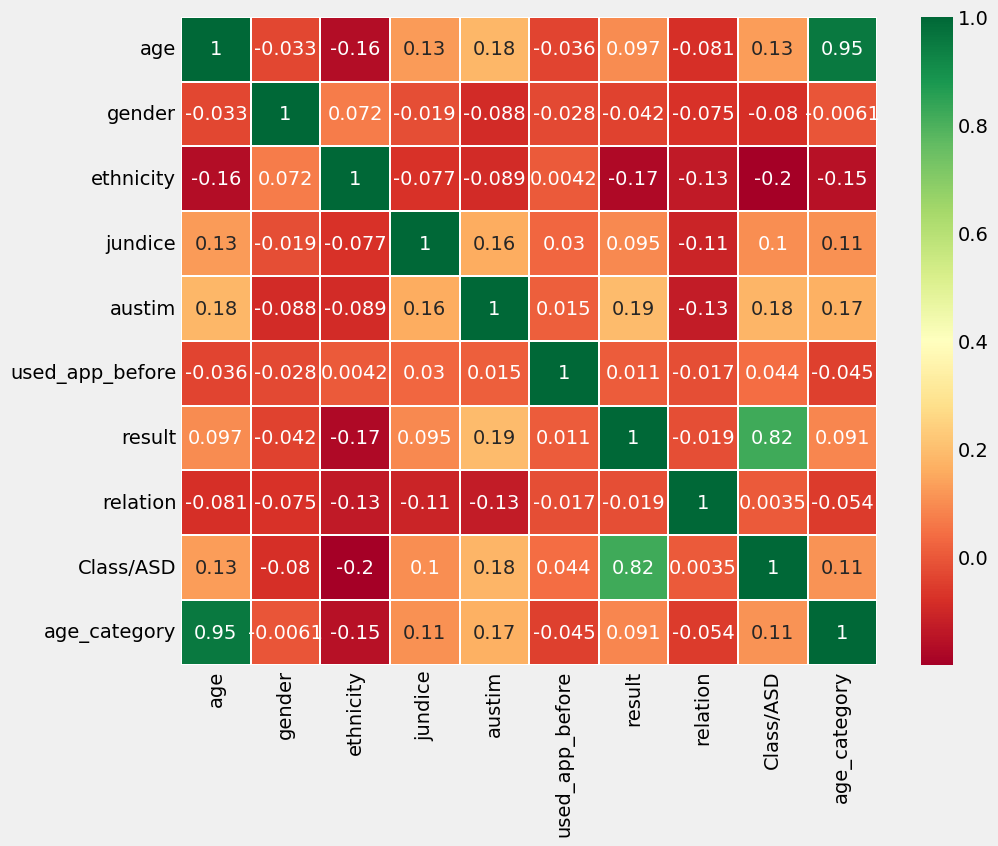

In [326]:
df_this = df.loc[:, ['age', 'gender',
       'ethnicity', 'jundice', 'austim', 'used_app_before',
       'result', 'relation', 'Class/ASD', 'age_category']]  
sns.heatmap(df_this.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show() 

In [327]:
resume.append(f'На обнаружение аутизма у тестируемого влияют: возраст, наличие родственников-аутистов, этническая принадлежность, страна, болел ли раньше желтухой')
resume.append('Баллы полученные за вопросы коррелируют с обнаружением аутизма')

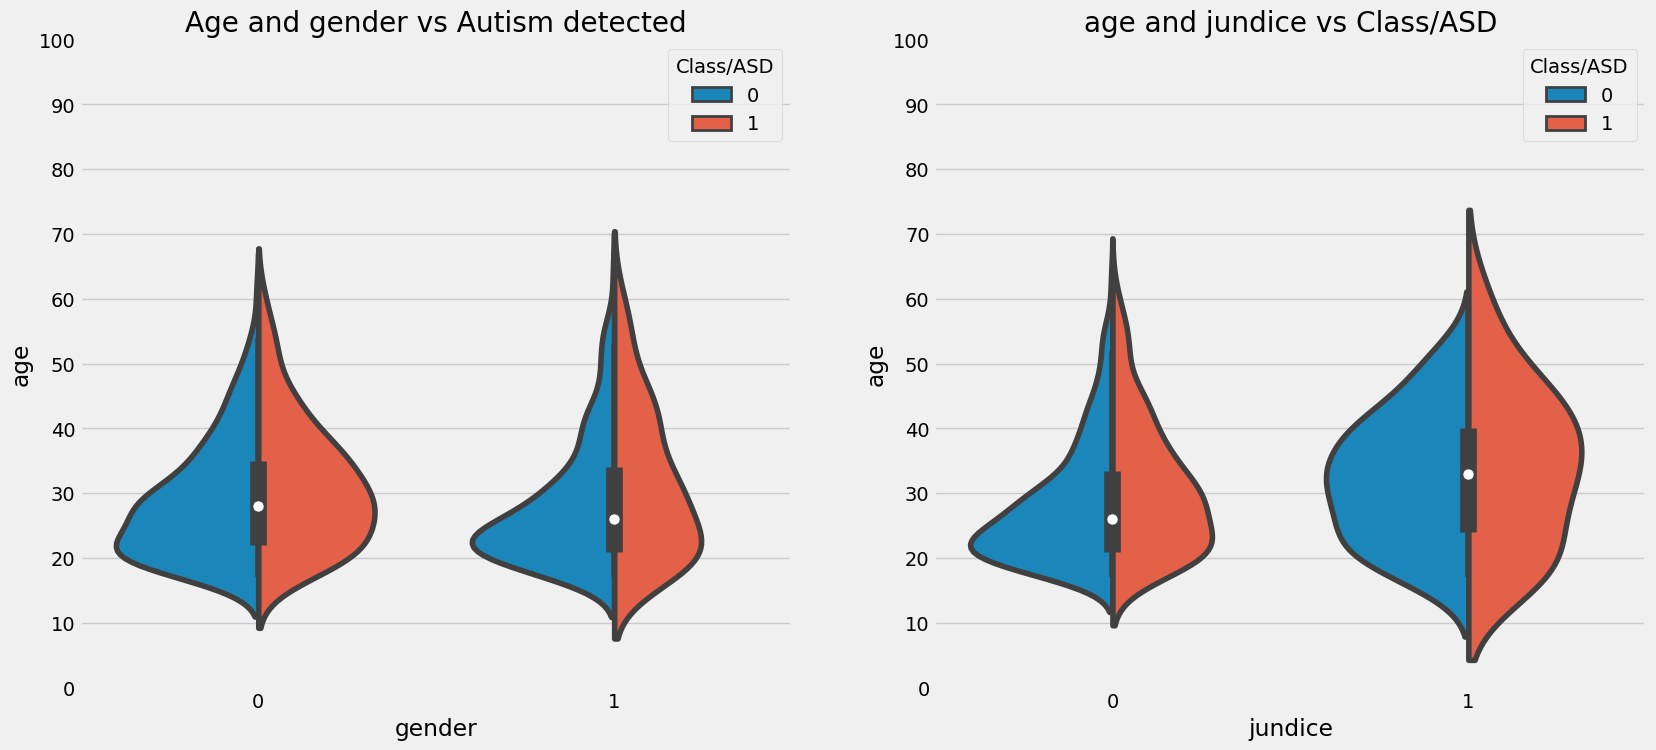

In [328]:
# Now we have the folowing features: gender, relatives with autism, having jundice, ethnics.
# They should have an inflience on having an autism. Age affects on autism detection
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(y="age",x="gender", hue="Class/ASD", data=df,split=True,ax=ax[0])
ax[0].set_title('Age and gender vs Autism detected')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(y="age",x="jundice", hue="Class/ASD", data=df,split=True,ax=ax[1])
ax[1].set_title('age and jundice vs Class/ASD')
ax[1].set_yticks(range(0,110,10))
plt.show()

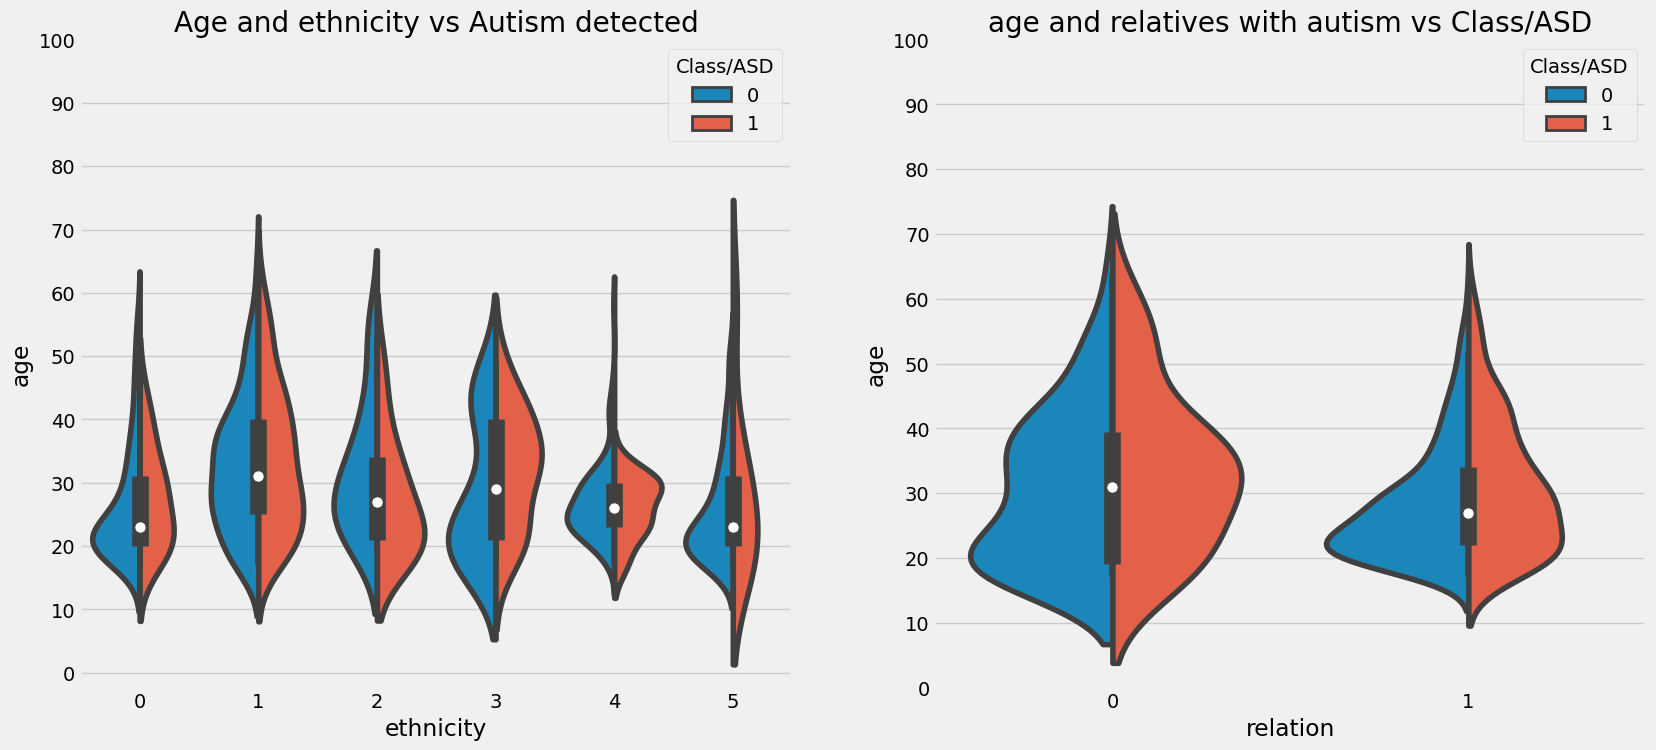

In [329]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(y="age",x="ethnicity", hue="Class/ASD", data=df,split=True,ax=ax[0])
ax[0].set_title('Age and ethnicity vs Autism detected')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(y="age",x="relation", hue="Class/ASD", data=df,split=True,ax=ax[1])
ax[1].set_title('age and relatives with autism vs Class/ASD')
ax[1].set_yticks(range(0,110,10))
plt.show()

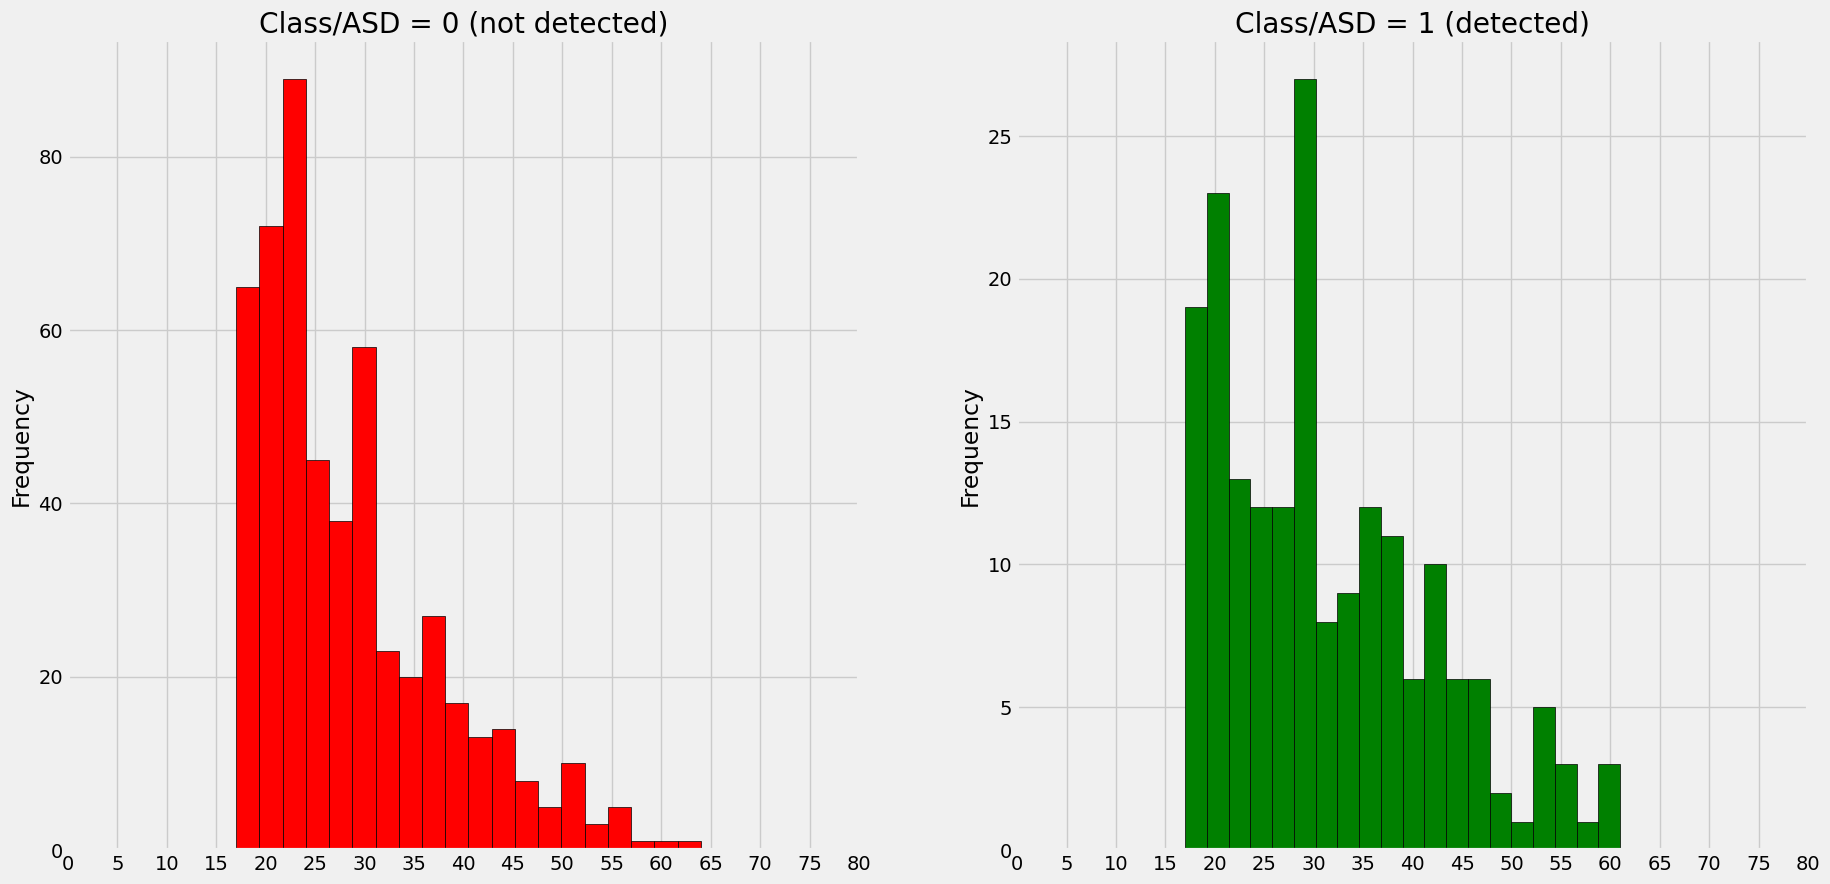

In [330]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Class/ASD']==0]['age'].plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Class/ASD = 0 (not detected)')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Class/ASD']==1]['age'].plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Class/ASD = 1 (detected)')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [335]:
df_lq = pd.read_csv('life_quality.csv', sep=',')
df_lq.head(2)

,rank,contry_of_res,life_q
0,1,Switzerland,195.27
1,2,Denmark,192.36


In [336]:
lq_mean = df_lq['life_q'].mean()
lq_min = df_lq['life_q'].min()
low_countries = ['Burundi', 'Afghanistan', 'Tonga', 'Sierra Leone',
       'Ethiopia', 'Viet Nam', 'Nicaragua', 'AmericanSamoa',
       'Niger', 'Nepal', 'Angola', 'Iraq']
mean_countries = ['Bolivia', 'Armenia', 'Bahamas', 'Aruba']

df_lq[df_lq['contry_of_res'] == 'Armenia'] 

,rank,contry_of_res,life_q


In [337]:
for state in mean_countries:
    df_lq = df_lq.append({'contry_of_res': state, 'life_q': lq_mean}, ignore_index=True)
for state in low_countries:
    df_lq = df_lq.append({'contry_of_res': state, 'life_q': lq_min}, ignore_index=True)  
df_lq[df_lq['contry_of_res'] == 'Armenia'] 

,rank,contry_of_res,life_q
88,NaN,Armenia,132.116782


In [338]:
df_new3 = pd.merge(df, df_lq, how='left', on='contry_of_res')
df_new3

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,contry_of_res,used_app_before,result,relation,Class/ASD,age_str,age_category,region,rank,life_q
0,1,1,1,1,0,0,1,1,0,0,...,United States,0,6,1,0,26,1,1,15.0,170.72
1,1,1,0,1,0,0,0,1,0,1,...,Brazil,0,5,1,0,24,1,0,65.0,107.04
2,1,1,0,1,1,0,1,1,1,1,...,Spain,0,8,0,1,27,1,5,18.0,168.48
3,1,1,0,1,0,0,1,1,0,1,...,United States,0,6,1,0,35,2,1,15.0,170.72
4,1,0,0,0,0,0,0,1,0,0,...,Egypt,0,2,1,0,40,2,2,80.0,89.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,Russia,0,7,1,1,25,1,7,70.0,103.28
700,1,0,0,0,0,0,0,1,0,1,...,Mexico,0,3,0,0,34,2,0,47.0,124.90
701,1,0,1,1,1,0,1,1,0,1,...,Russia,0,7,1,1,24,1,7,70.0,103.28
702,1,0,0,1,1,0,1,0,1,1,...,Pakistan,0,6,1,0,35,2,4,71.0,102.57


In [339]:
df_new3.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity           0
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
relation            0
Class/ASD           0
age_str             0
age_category        0
region              0
rank               36
life_q              0
dtype: int64

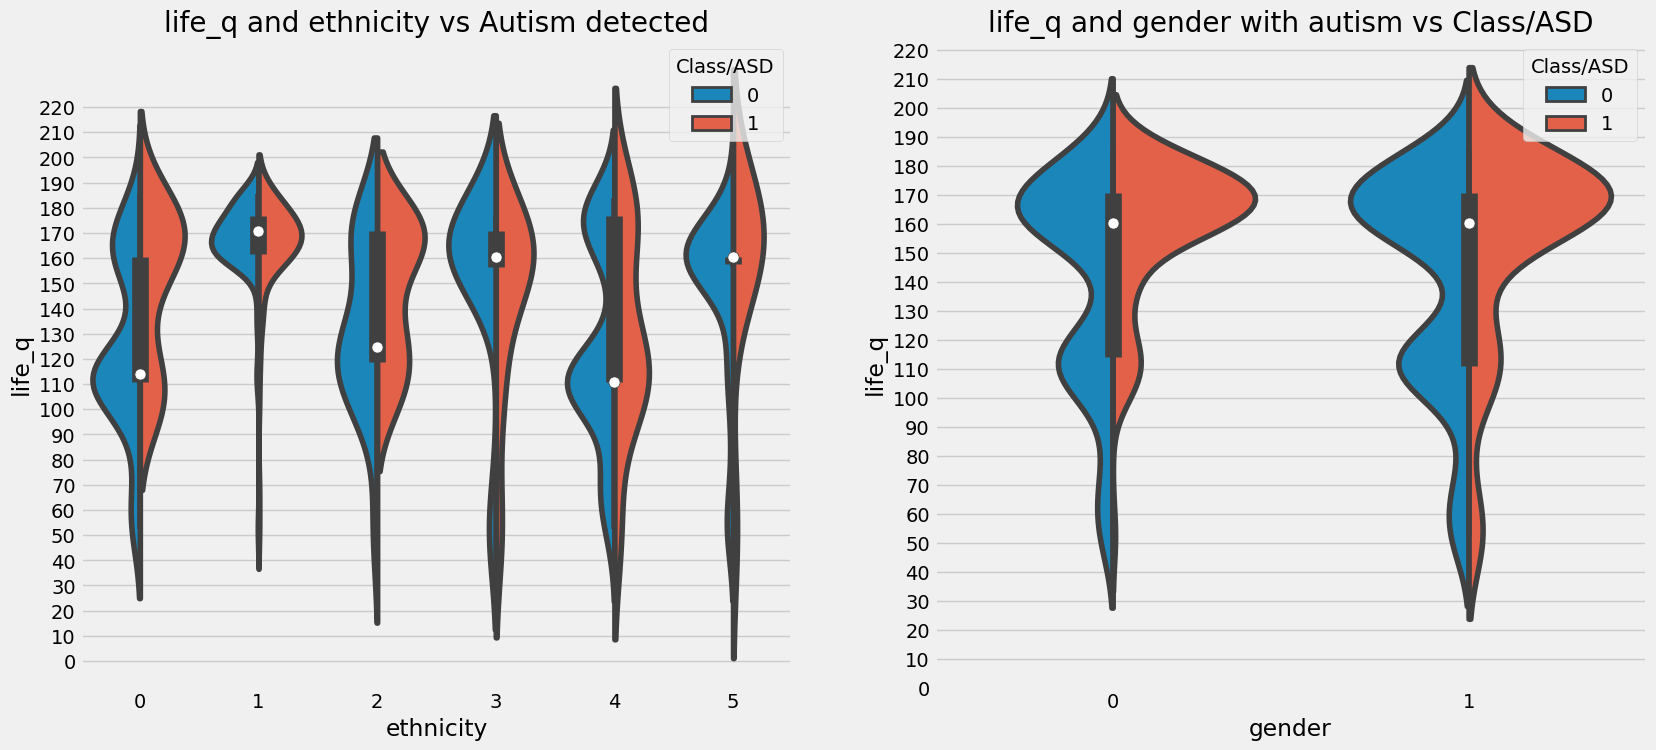

In [340]:
top = int(df_lq['life_q'].max()) + 30
low = int(df_lq['life_q'].min())
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(y="life_q",x="ethnicity", hue="Class/ASD", data=df_new3,split=True,ax=ax[0])
ax[0].set_title('life_q and ethnicity vs Autism detected')
ax[0].set_yticks(range(0,top,10))
sns.violinplot(y="life_q",x="gender", hue="Class/ASD", data=df_new3,split=True,ax=ax[1])
ax[1].set_title('life_q and gender with autism vs Class/ASD')
ax[1].set_yticks(range(0,top,10))
plt.show()

Summary: with age, the probability of detecting autism increases, more autism is detected in whites, blacks and Hispanics than in Asians. Having an autistic relative increases the risk of having the disease, more cases of autism are found in countries with a high quality of living. Either they test better, or the lifestyle influenses. 
    Autism is diagnosed less frequently for men than for women.

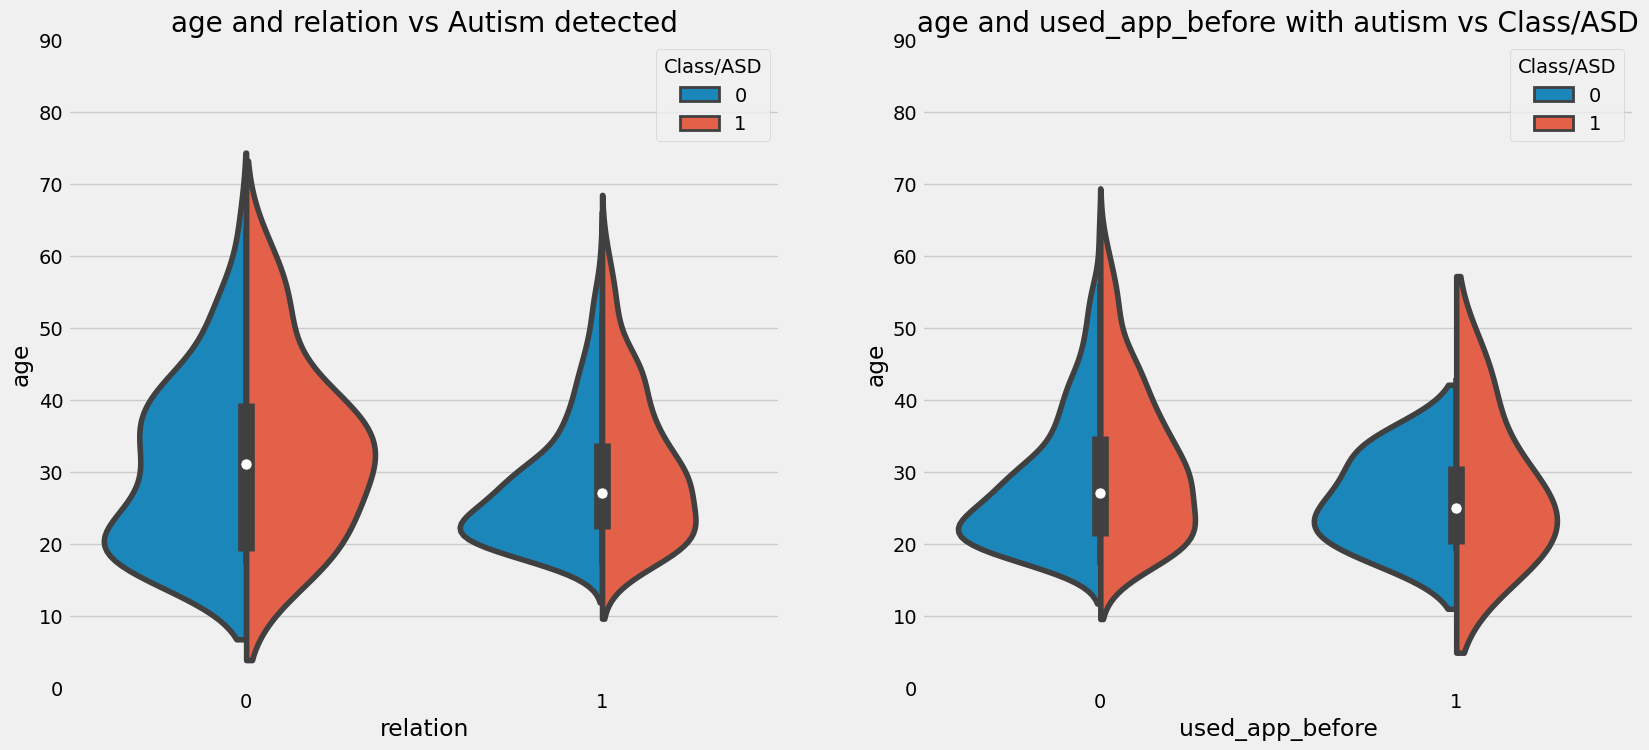

In [341]:

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(y="age",x="relation", hue="Class/ASD", data=df_new3,split=True,ax=ax[0])
ax[0].set_title('age and relation vs Autism detected')
ax[0].set_yticks(range(0,100,10))
sns.violinplot(y="age",x="used_app_before", hue="Class/ASD", data=df_new3,split=True,ax=ax[1])
ax[1].set_title('age and used_app_before with autism vs Class/ASD')
ax[1].set_yticks(range(0,100,10))
plt.show()

In [342]:
df_new[df['used_app_before']==1]['age']

61     20.0
176    43.0
207    25.0
313    19.0
375    25.0
428    20.0
434    34.0
435    23.0
543    30.0
564    19.0
649    33.0
695    28.0
Name: age, dtype: float64

In [343]:
resume

['С увеличением возрастной категории растет доля обнаружения случаев аутизма',
 'Среди мужчин и женцин в выборке мужчин доля здоровых больше на  7.13 чем доля здоровых женщин в выборке женщин',
 'Количество набранных баллов: до 7 - случаев аутизма нет. Все случаи аутизма относятся к тем, кто набрал более 7',
 'Чаще всего аутизм обнаруживается у White-European(1), Latino(2), Black(3), Hispanic(2)',
 'Чаще всего аутизм обнаруживается у White-European(1), Latino(2), Black(3), Hispanic(2)',
 'Доля случаев аутизма выше для европейцев и североамериканцев. А нет ли тут связи с уровнем жизни? ',
 'среди родственников аутистов аутизм встречается чаще на 23.44% .',
 'У болевших желтухой аутизм встречается чаще на 15.23% .',
 'У уже проходивших тест аутизм встречается чаще на 15.08% .',
 'У уже проходивших тест аутизм встречается чаще на 15.08% .',
 'На обнаружение аутизма у тестируемого влияют: возраст, наличие родственников-аутистов, этническая принадлежность, страна, болел ли раньше желтухой',